# BreastCancer Classification

Modellen:
1. KNN
2. Logistic Regression
3. Decision Tree Classifier

In [3]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [4]:
#data = pd.read_csv('/Users/sennechin/AppliedAI/dataSets/breast_cancer_survival.csv')
data = pd.read_csv('../datasets/breast_cancer_survival.csv')
data

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,42,FEMALE,0.952560,2.15000,0.007972,-0.048340,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,20-May-18,26-Aug-18,Alive
1,54,FEMALE,0.000000,1.38020,-0.498030,-0.507320,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,26-Apr-18,25-Jan-19,Dead
2,63,FEMALE,-0.523030,1.76400,-0.370190,0.010815,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Lumpectomy,24-Aug-18,08-Apr-20,Alive
3,78,FEMALE,-0.876180,0.12943,-0.370380,0.132190,I,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,16-Nov-18,28-Jul-20,Alive
4,42,FEMALE,0.226110,1.74910,-0.543970,-0.390210,II,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Lumpectomy,12-Dec-18,05-Jan-19,Alive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,59,FEMALE,0.024598,1.40050,0.024751,0.280320,II,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Lumpectomy,15-Jan-19,27-Mar-20,Alive
330,41,FEMALE,0.100120,-0.46547,0.472370,-0.523870,I,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Modified Radical Mastectomy,25-Jul-18,23-Apr-19,Alive
331,54,FEMALE,0.753820,1.64250,-0.332850,0.857860,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Simple Mastectomy,26-Mar-19,11-Oct-19,Dead
332,74,FEMALE,0.972510,1.42680,-0.366570,-0.107820,II,Infiltrating Lobular Carcinoma,Positive,Positive,Negative,Lumpectomy,26-Nov-18,05-Dec-18,Alive


In [5]:
data.nunique()

Age                    57
Gender                  2
Protein1              333
Protein2              334
Protein3              334
Protein4              333
Tumour_Stage            3
Histology               3
ER status               1
PR status               1
HER2 status             2
Surgery_type            4
Date_of_Surgery       181
Date_of_Last_Visit    285
Patient_Status          2
dtype: int64

In [6]:
data.isna().sum()

Age                    0
Gender                 0
Protein1               0
Protein2               0
Protein3               0
Protein4               0
Tumour_Stage           0
Histology              0
ER status              0
PR status              0
HER2 status            0
Surgery_type           0
Date_of_Surgery        0
Date_of_Last_Visit    17
Patient_Status        13
dtype: int64

## ER and PR status can be dropped they are not unique.
## I also drop the tables that have null values.

In [7]:
data = data.dropna()

In [8]:
data.isna().sum()

Age                   0
Gender                0
Protein1              0
Protein2              0
Protein3              0
Protein4              0
Tumour_Stage          0
Histology             0
ER status             0
PR status             0
HER2 status           0
Surgery_type          0
Date_of_Surgery       0
Date_of_Last_Visit    0
Patient_Status        0
dtype: int64

In [9]:
data

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,42,FEMALE,0.952560,2.15000,0.007972,-0.048340,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,20-May-18,26-Aug-18,Alive
1,54,FEMALE,0.000000,1.38020,-0.498030,-0.507320,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,26-Apr-18,25-Jan-19,Dead
2,63,FEMALE,-0.523030,1.76400,-0.370190,0.010815,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Lumpectomy,24-Aug-18,08-Apr-20,Alive
3,78,FEMALE,-0.876180,0.12943,-0.370380,0.132190,I,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,16-Nov-18,28-Jul-20,Alive
4,42,FEMALE,0.226110,1.74910,-0.543970,-0.390210,II,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Lumpectomy,12-Dec-18,05-Jan-19,Alive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,59,FEMALE,0.024598,1.40050,0.024751,0.280320,II,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Lumpectomy,15-Jan-19,27-Mar-20,Alive
330,41,FEMALE,0.100120,-0.46547,0.472370,-0.523870,I,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Modified Radical Mastectomy,25-Jul-18,23-Apr-19,Alive
331,54,FEMALE,0.753820,1.64250,-0.332850,0.857860,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Simple Mastectomy,26-Mar-19,11-Oct-19,Dead
332,74,FEMALE,0.972510,1.42680,-0.366570,-0.107820,II,Infiltrating Lobular Carcinoma,Positive,Positive,Negative,Lumpectomy,26-Nov-18,05-Dec-18,Alive


# Check for outliers only for variables

In [10]:
# Separate numerical and categorical features
num_cols = pd.DataFrame (data, columns= ['Age', 'Protein1', 'Protein2', 'Protein3', 'Protein4'])
cat_cols = pd.DataFrame (data, columns= ['Gender', 'Tumour_Stage', 'ER status', 'PR status', 'HER2 status', 'Surgery_type', 'Patient_Status'])

In [11]:
# Visualizing the Numerical Features by boxplots
sns.set_style('darkgrid')
def boxplots_custom(dataset, columns_list, rows, cols, suptitle):
    fig, axs = plt.subplots(rows, cols, sharey=True, figsize=(15,7))
    fig.suptitle(suptitle, y=1, size=25)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        sns.boxplot(data=dataset[data], orient='h', color ='#6fcfbc', ax=axs[i])
        axs[i].set_title(data + ', skewness is: '+str(round(dataset[data].skew(axis = 0, skipna = True), 2)))

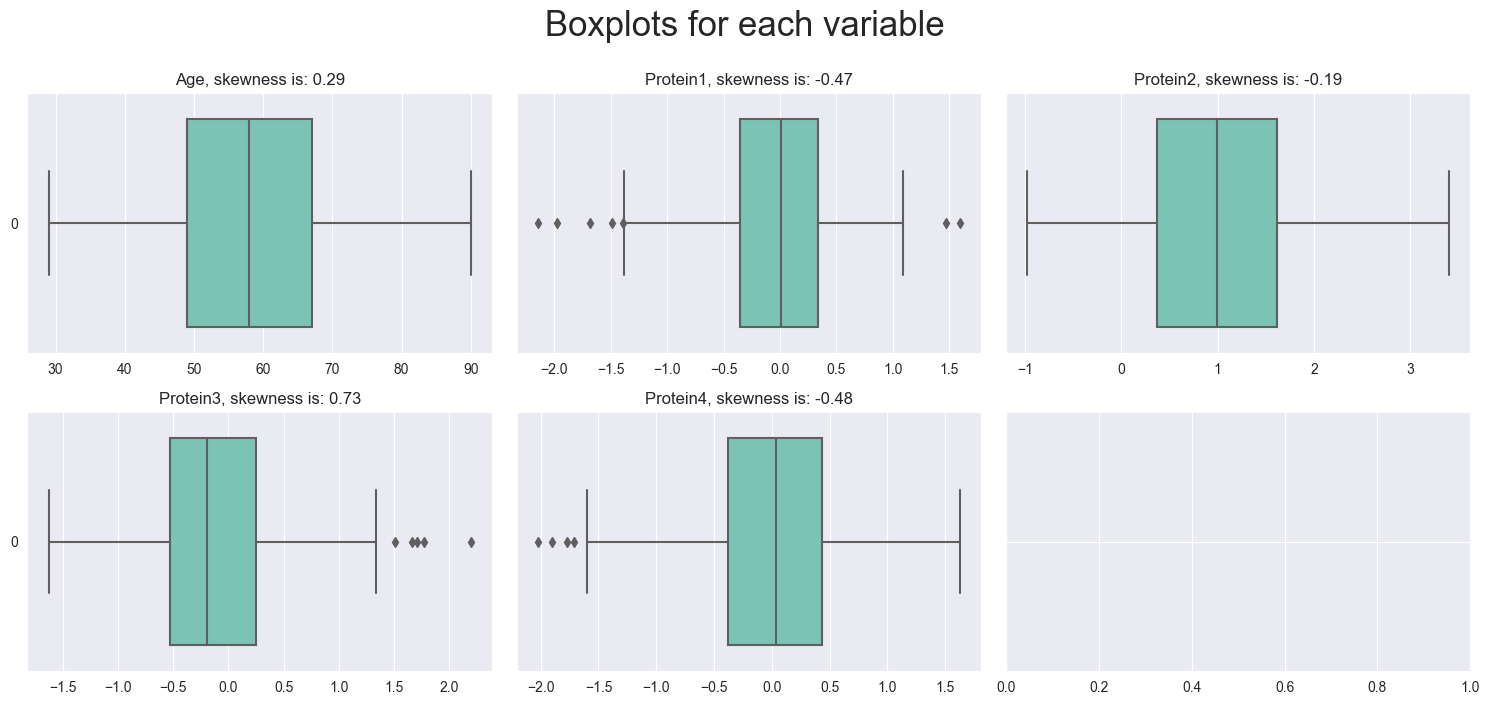

In [12]:
boxplots_custom(dataset=data, columns_list=num_cols, rows=2, cols=3, suptitle='Boxplots for each variable')
plt.tight_layout()

For protein 1, 3 and 4 there are outliers

# Cleaning up data even more

In [13]:
df = data
# Replaces the string values 'FEMALE' and 'MALE' in 0 and 1 (1 FOR FEMALE)
df['Gender'].replace({'FEMALE': 1, 'MALE': 0},inplace = True)
# Replaces the string values 'Positive' and 'Negative' in 0 and 1 (1 FOR Positive)
df['HER2 status'].replace({'Positive': 1, 'Negative': 0},inplace = True)
# Replaces the string values 'Alive' and 'Dead' in 0 and 1 (1 FOR Alive)
df['Patient_Status'].replace({'Alive': 1, 'Dead': 0},inplace = True)

# Onehot encode Tumour_Stage
onehot = pd.get_dummies(df['Tumour_Stage'], prefix='Tumour_Stage')
df = pd.concat([df, onehot], axis=1)
df = df.drop('Tumour_Stage', axis=1)
# Onehot encode Histology
onehot = pd.get_dummies(df['Histology'], prefix='Histology')
df = pd.concat([df, onehot], axis=1)
df = df.drop('Histology', axis=1)
# Onehot encode Surgery_type
onehot = pd.get_dummies(df['Surgery_type'], prefix='Surgery_type')
df = pd.concat([df, onehot], axis=1)
df = df.drop('Surgery_type', axis=1)
# Drop columns ER status and PR status
df = df.drop('ER status', axis=1)
df = df.drop('PR status', axis=1)

df = df.drop('Date_of_Last_Visit', axis=1)
df = df.drop('Date_of_Surgery', axis=1)

df

/var/folders/2p/m8pz9vjx3zn73ndc2lz_zb0w0000gn/T/ipykernel_74213/1478551502.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender'].replace({'FEMALE': 1, 'MALE': 0},inplace = True)
/var/folders/2p/m8pz9vjx3zn73ndc2lz_zb0w0000gn/T/ipykernel_74213/1478551502.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['HER2 status'].replace({'Positive': 1, 'Negative': 0},inplace = True)
/var/folders/2p/m8pz9vjx3zn73ndc2lz_zb0w0000gn/T/ipykernel_74213/1478551502.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.o

,Age,Gender,Protein1,Protein2,Protein3,Protein4,HER2 status,Patient_Status,Tumour_Stage_I,Tumour_Stage_II,Tumour_Stage_III,Histology_Infiltrating Ductal Carcinoma,Histology_Infiltrating Lobular Carcinoma,Histology_Mucinous Carcinoma,Surgery_type_Lumpectomy,Surgery_type_Modified Radical Mastectomy,Surgery_type_Other,Surgery_type_Simple Mastectomy
0,42,1,0.952560,2.15000,0.007972,-0.048340,0,1,0,1,0,1,0,0,0,0,1,0
1,54,1,0.000000,1.38020,-0.498030,-0.507320,0,0,0,1,0,1,0,0,0,0,1,0
2,63,1,-0.523030,1.76400,-0.370190,0.010815,0,1,0,1,0,1,0,0,1,0,0,0
3,78,1,-0.876180,0.12943,-0.370380,0.132190,0,1,1,0,0,1,0,0,0,0,1,0
4,42,1,0.226110,1.74910,-0.543970,-0.390210,1,1,0,1,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,59,1,0.024598,1.40050,0.024751,0.280320,1,1,0,1,0,1,0,0,1,0,0,0
330,41,1,0.100120,-0.46547,0.472370,-0.523870,1,1,1,0,0,1,0,0,0,1,0,0
331,54,1,0.753820,1.64250,-0.332850,0.857860,0,0,0,1,0,1,0,0,0,0,0,1
332,74,1,0.972510,1.42680,-0.366570,-0.107820,0,1,0,1,0,0,1,0,1,0,0,0


# Looking for correlations between different variables

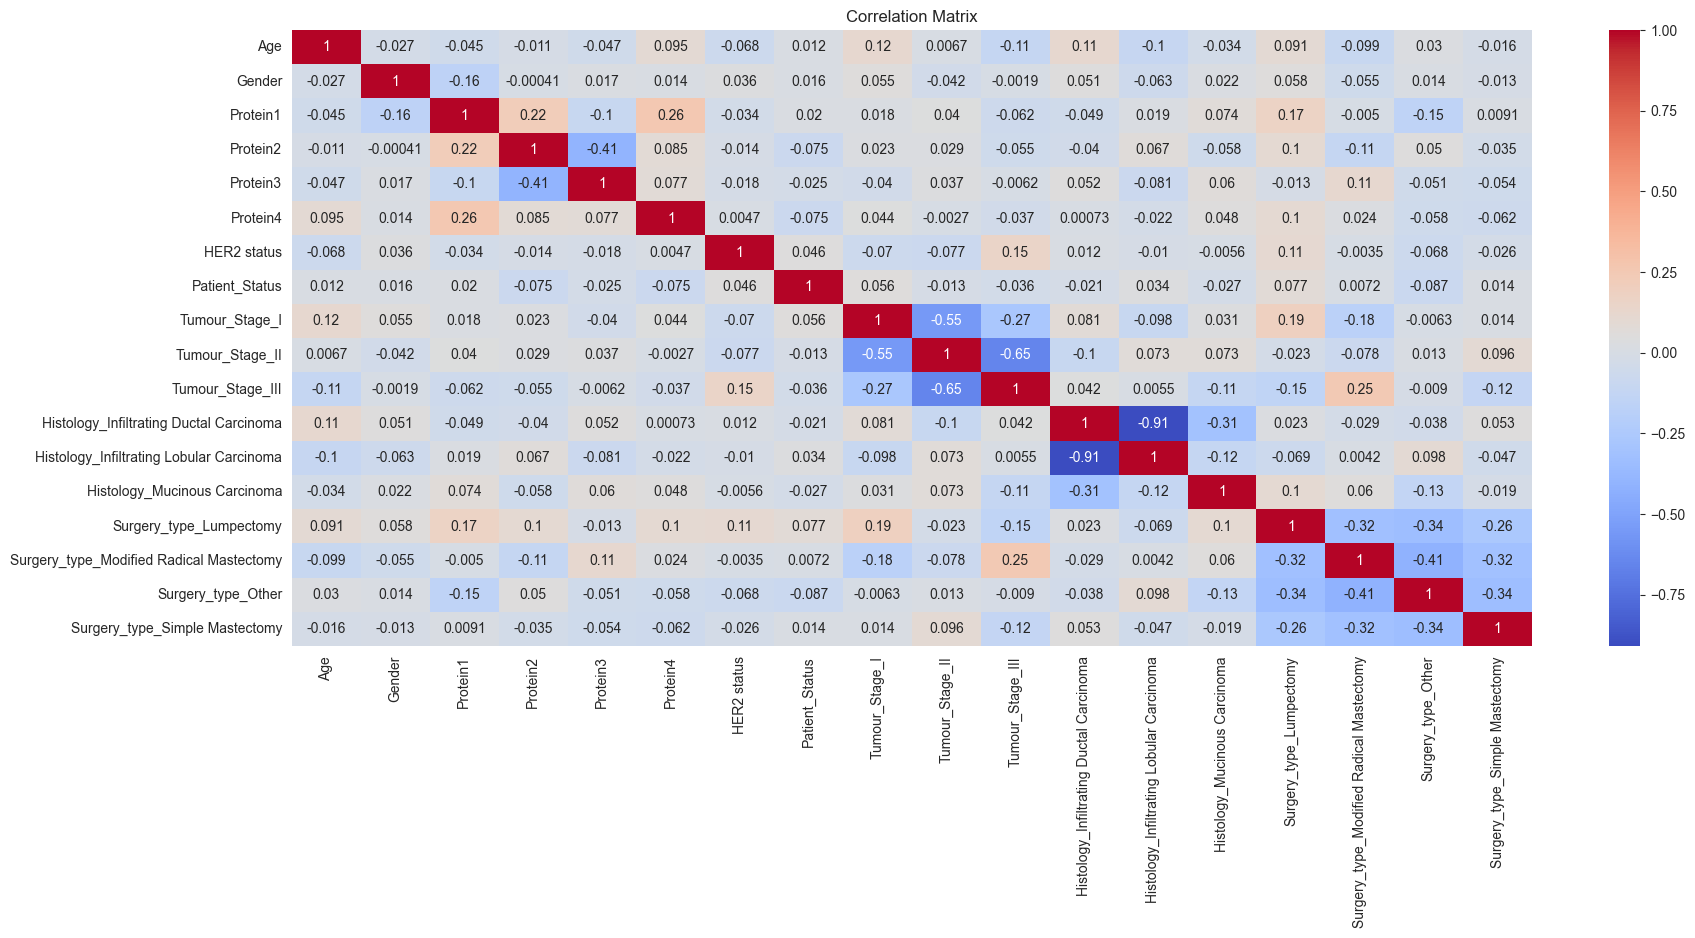

In [14]:
# Bereken correlation matrix
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(20, 8))

# Plot de correlation matrix als een heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', ax = ax )
plt.title('Correlation Matrix')
plt.show()

### Clusters

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


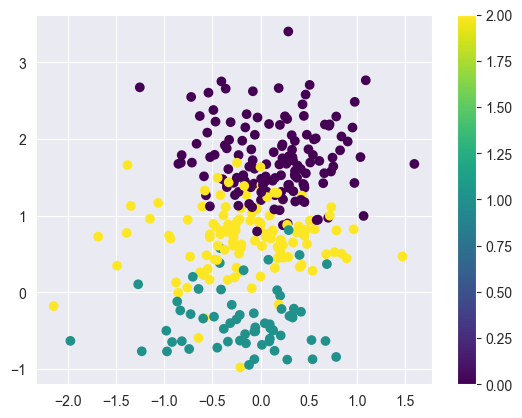

In [15]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Preprocess the data
df3 = df[['Protein1','Protein2','Protein3','Protein4']]

X = df3.values

# Apply KMeans clustering with 3 clusters
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

# Get the cluster labels for each data point
labels = kmeans.labels_

# Get the cluster centers
centers = kmeans.cluster_centers_

# Plot the data points with different colors for each cluster
scatter = plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
# Add a colorbar to the plot
plt.colorbar(scatter)

plt.show()

### Analyse
Als ik kijk naar de 3 verschillende clusters dan valt op dat geel en roze dichtbij elkaar liggen en hetzelfde geldt voor cyan en roze. Dit kan betekenen dat er overeenkomsten zijn tussen deze proteins. Het cluster algoritme is wel succesvol in het herkennen van patronen in de data, want er zijn overduidelijk 3 groepen.

## My Goal:
1. We are going to classify the patient status and the tumor type.
2. With regression we are going to predict the age of the patient.

Ik wil de verdeling zien bij de column patient status

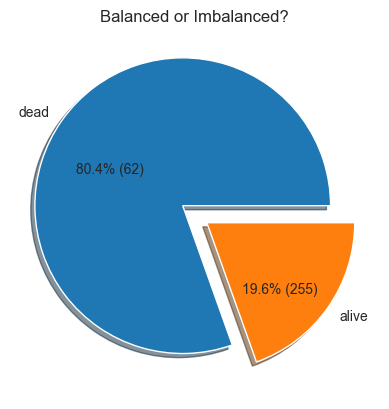

In [16]:
# Count the number of occurrences of each value in the 'Patient_Status' column
value_counts = df['Patient_Status'].value_counts()
# Define the label strings using f-strings
label = [f'{"dead" if i==0 else "alive"}' for i in range(len(value_counts))]

# Create a pie chart with percentage values formatted with a % sign and explode the slices
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(value_counts.values, autopct='%0.1f%%', explode=[0.1, 0.1], shadow=True, labels=label)

# Add count under percentage
for i, autotext in enumerate(autotexts):
    count = value_counts[i]
    autotext.set_text(f'{autotext.get_text()} ({count})')
    autotext.set_y(autotext.get_position()[1]-0.1)

# Set the title of the pie chart
ax.set_title('Balanced or Imbalanced?')

# Show the pie chart
plt.show()

Balanced or imbalanced?
Ik vind deze collumn niet balanced, want uitkomst 0 (dead) heeft 80%.

We gaan het classificeren met KNN algoritme

In [17]:
df

,Age,Gender,Protein1,Protein2,Protein3,Protein4,HER2 status,Patient_Status,Tumour_Stage_I,Tumour_Stage_II,Tumour_Stage_III,Histology_Infiltrating Ductal Carcinoma,Histology_Infiltrating Lobular Carcinoma,Histology_Mucinous Carcinoma,Surgery_type_Lumpectomy,Surgery_type_Modified Radical Mastectomy,Surgery_type_Other,Surgery_type_Simple Mastectomy
0,42,1,0.952560,2.15000,0.007972,-0.048340,0,1,0,1,0,1,0,0,0,0,1,0
1,54,1,0.000000,1.38020,-0.498030,-0.507320,0,0,0,1,0,1,0,0,0,0,1,0
2,63,1,-0.523030,1.76400,-0.370190,0.010815,0,1,0,1,0,1,0,0,1,0,0,0
3,78,1,-0.876180,0.12943,-0.370380,0.132190,0,1,1,0,0,1,0,0,0,0,1,0
4,42,1,0.226110,1.74910,-0.543970,-0.390210,1,1,0,1,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,59,1,0.024598,1.40050,0.024751,0.280320,1,1,0,1,0,1,0,0,1,0,0,0
330,41,1,0.100120,-0.46547,0.472370,-0.523870,1,1,1,0,0,1,0,0,0,1,0,0
331,54,1,0.753820,1.64250,-0.332850,0.857860,0,0,0,1,0,1,0,0,0,0,0,1
332,74,1,0.972510,1.42680,-0.366570,-0.107820,0,1,0,1,0,0,1,0,1,0,0,0


In [18]:
y = df['Patient_Status'].values.reshape(-1, 1).ravel()
X = df.drop(['Patient_Status'], axis=1)

In [19]:
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2, random_state=1)

# Create a KNN classifier with k=3
knn = KNeighborsClassifier(n_neighbors=8)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Predict the class labels for the testing data
y_pred = knn.predict(X_test)

# Print the accuracy score of the classifier
print("Accuracy:", knn.score(X_test, y_test))



Accuracy: 0.796875


0.8 is een goede accuracy, maar ik heb gelezen wanneer de dataset imbalanced is kan je accuracy score niet gebruiken als metric. Gebruik implaats van accuracy score: f1-score, precision/recall score or confusion matrix

### F1-score precision/recall

In [20]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.07      0.13        14
           1       0.79      1.00      0.88        50

    accuracy                           0.80        64
   macro avg       0.90      0.54      0.51        64
weighted avg       0.84      0.80      0.72        64



- De precision voor beide klassen zijn erg hoog. Dit is goed nieuws. (true positives)
- De recall is 0.07 bij 0, dit betekend dat 7% van de werkelijke 0-labels correct zijn voorspeld. Dit is niet goed. Bij klasse 1 is de recall 1, dit is heel goed.
- De F1-score: geeft een evenwicht tussen precisie en recall. 0.13 bij klasse 0 geeft weer dat er een onevenwicht is tussen precisie en recall dit is niet goed. Ik denk dat het model te snel kiest voor klasse 1. Omdat het model hierop meer is getraind. Het model zal niet snel kiezen voor klasse 0 of hij moet het heel zeker weten.

### Confusion Matrix

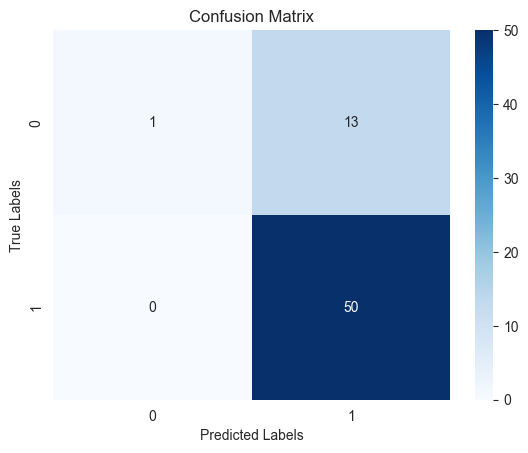

In [21]:
# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Create the heatmap using seaborn
sns.heatmap(cm, annot=True, cmap="Blues")
# Set the axis labels and title
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
# Show the plot
plt.show()

## Analyse
50 true positives maar 1 true negative. Dat we maar 1 true negative hebben is wel zorgwekkend. Dit kan komen doordat de dataset onbalanceerd is

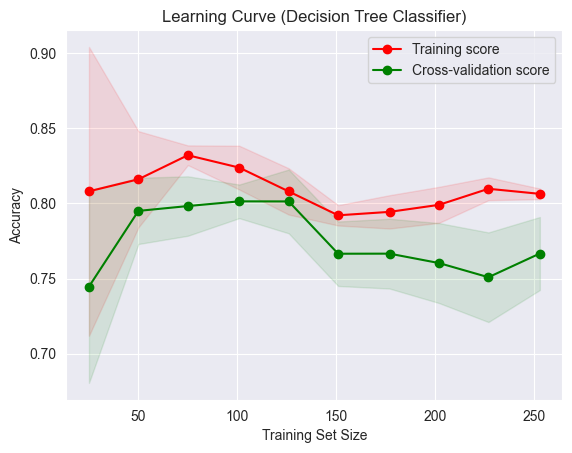

In [22]:
from sklearn.model_selection import learning_curve
import numpy as np

# Create arrays of different training set sizes
train_sizes, train_scores, test_scores = learning_curve(KNeighborsClassifier(n_neighbors=8), X, y.ravel(), cv=5, train_sizes=np.linspace(0.1, 1.0, 10))

# Calculate the mean and standard deviation of the training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure()
plt.title("Learning Curve (Decision Tree Classifier)")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.legend(loc="best")
plt.show()

# LogisticRegression

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


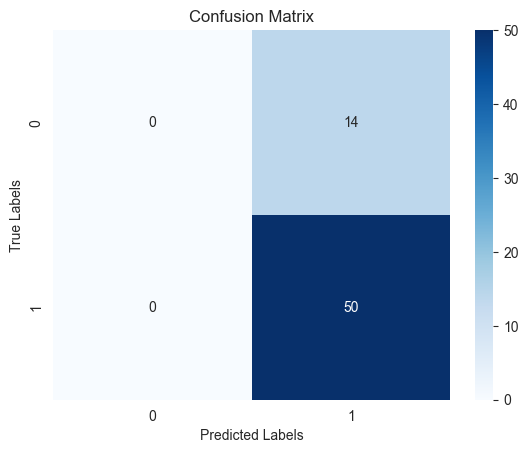

In [23]:
from sklearn.linear_model import LogisticRegression

X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y , test_size=0.2, random_state=1)

model = LogisticRegression()

# Fit the logistic regression model to the training data
model.fit(X_train1, y_train1)

predictions = model.predict(X_test1)

from sklearn.metrics import confusion_matrix

# Create the confusion matrix
cm = confusion_matrix(y_test1, predictions)
# Create the heatmap using seaborn
sns.heatmap(cm, annot=True, cmap="Blues")
# Set the axis labels and title
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
# Show the plot
plt.show()



0 true negatives dit is niet goed. Dit kan weer komen doordat het model niet in evenwicht is. Maar ik het is ook mogelijk dat het model te snel voor positive kiest.

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

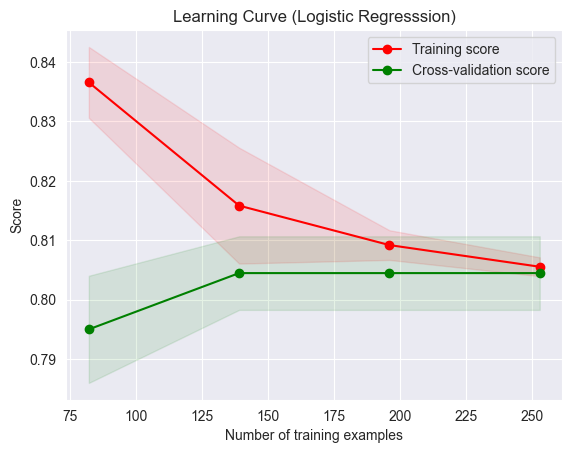

In [24]:
from sklearn.model_selection import learning_curve
import numpy as np

# Create arrays of different training set sizes
train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5)

# Calculate the mean and standard deviation of the training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure()
plt.title("Learning Curve (Logistic Regresssion)")
plt.xlabel("Number of training examples")
plt.ylabel("Score")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.legend(loc="best")
plt.show()

### Warnings

De foutmelding "logistic regression model did not converge, and the maximum number of iterations was reached"
- Om dit op te lossen ga ik het model een max-iter meegeven zodat we de max iterations verhogen.
- En ik heb de data gescaled, zodat het logistic regression model sneller en accurater kan verwerken.

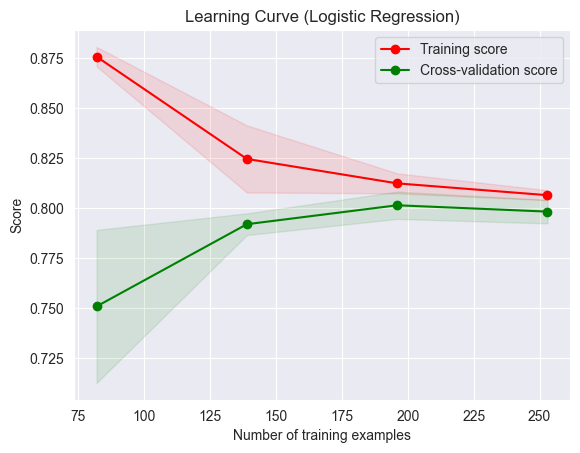

In [25]:
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import numpy as np

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create a logistic regression model with a higher maximum number of iterations
model = LogisticRegression(max_iter=1000)

# Create arrays of different training set sizes
train_sizes, train_scores, test_scores = learning_curve(model, X_scaled, y.ravel(), cv=5)

# Calculate the mean and standard deviation of the training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure()
plt.title("Learning Curve (Logistic Regression)")
plt.xlabel("Number of training examples")
plt.ylabel("Score")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.legend(loc="best")
plt.show()


### Analyse learning curve
In het algemeen willen we de twee lijnen zo dichtbij elkaar mogelijk. Als de train lijn te hoog zit in vergelijking met CV kan dat een indicatie zijn voor overfitting. Als de lijn te hoog is kunnen we de complexiteit van het model omlagen. Of we voegen meer training data toevoegen.

Als de Training lijn onder de CV lijn zit kan dit een indicatie zijn van underfitting. Het model kan niet complex genoeg zijn, waardoor hij niet patronen in de Data kan herkennen. Het toevoegen van meer features kan dit mogelijk oplossen.

# Decision Tree Classifier

0.703125


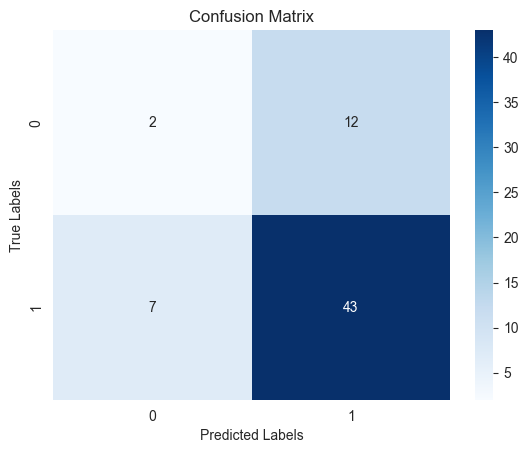

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
clf = DecisionTreeClassifier(max_depth=10)
clf.fit(X_train1, y_train1)

y_predTree = clf.predict(X_test1)

accuracy = accuracy_score(y_test1,y_predTree)
print(accuracy)

# Create the confusion matrix
cm = confusion_matrix(y_test1, y_predTree)
# Create the heatmap using seaborn
sns.heatmap(cm, annot=True, cmap="Blues")
# Set the axis labels and title
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
# Show the plot
plt.show()


Ik heb de max_depth op 10 gezet, zodat het model niet underFit is. Ik merk als ik de depth laag zet dat ik 0 true negatives heb. Nu is mijn accuracy wel lager maar heeft het model ook negative als voorspellingen.

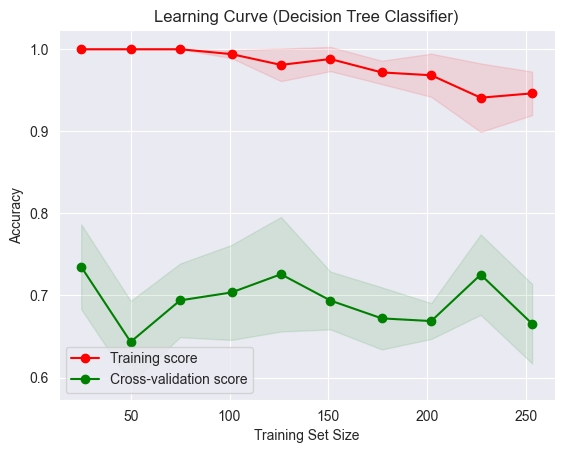

In [27]:
from sklearn.model_selection import learning_curve
import numpy as np

# Create arrays of different training set sizes
train_sizes, train_scores, test_scores = learning_curve(clf, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))

# Calculate the mean and standard deviation of the training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure()
plt.title("Learning Curve (Decision Tree Classifier)")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.legend(loc="best")
plt.show()

De training line is duidelijk hoger dus we spreken over Overfitting. Het model dat hier gebruikt wordt is Decision Tree Classifier. Om het overfitten op te lossen wil ik de complexiteit van het model verlagen. Dit doe ik door de Depth te verlagen.

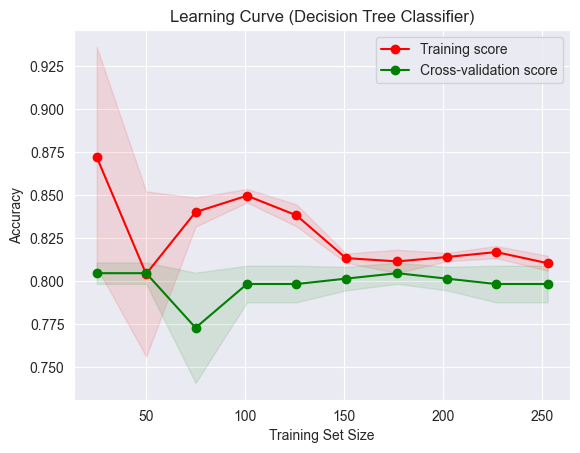

In [28]:
from sklearn.model_selection import learning_curve
import numpy as np

# Create arrays of different training set sizes
train_sizes, train_scores, test_scores = learning_curve(DecisionTreeClassifier(max_depth=1), X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))

# Calculate the mean and standard deviation of the training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure()
plt.title("Learning Curve (Decision Tree Classifier)")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.legend(loc="best")
plt.show()

Een Decision Tree Classifier met een depth van 1 ook wel decision stump genoemd. Kan gebruikt worden als de dataset unbalanced is. Het is de simpelste versie van een Decision Tree.

# Alle algoritmes tegelijkertijd

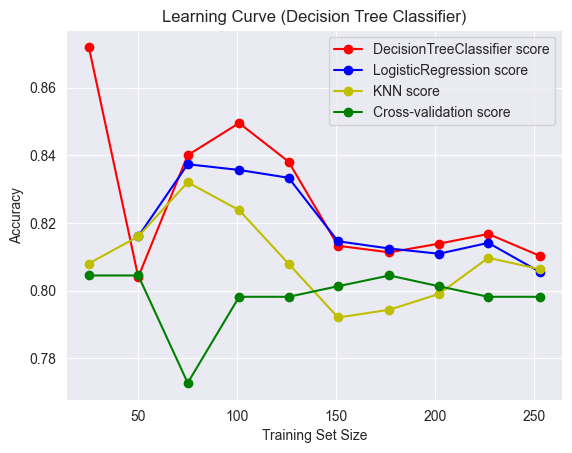

In [29]:
from sklearn.model_selection import learning_curve
import numpy as np

# Create arrays of different training set sizes
train_sizes, train_scores, test_scores = learning_curve(DecisionTreeClassifier(max_depth=1), X, y.ravel(), cv=5, train_sizes=np.linspace(0.1, 1.0, 10))
train_sizes1, train_scores1, test_scores1 = learning_curve(LogisticRegression(max_iter=1000), X, y.ravel(), cv=5, train_sizes=np.linspace(0.1, 1.0, 10))
train_sizes2, train_scores2, test_scores2 = learning_curve( KNeighborsClassifier(n_neighbors=8), X, y.ravel(), cv=5, train_sizes=np.linspace(0.1, 1.0, 10))

# Calculate the mean and standard deviation of the training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

train_scores_mean1 = np.mean(train_scores1, axis=1)
test_scores_mean1 = np.mean(test_scores1, axis=1)

train_scores_mean2 = np.mean(train_scores2, axis=1)
test_scores_mean2 = np.mean(test_scores2, axis=1)

# Plot the learning curve
plt.figure()
plt.title("Learning Curve (Decision Tree Classifier)")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")

plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="DecisionTreeClassifier score")
plt.plot(train_sizes1, train_scores_mean1, 'o-', color="b", label="LogisticRegression score")
plt.plot(train_sizes2, train_scores_mean2, 'o-', color="y", label="KNN score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.legend(loc="best")
plt.show()

# Analyse
Als we kijken naar alle algoritmes komen ze allemaal boven de groene lijn meer en deels. Ik denk dat dit vooral komt doordat de patient status column niet goed gebalanceerd is, dus daardoor werken de classificatie algoritmes niet optimaal. Deze manier van overfitting is denk ik niet te heftig, en ik denk dat hij nieuwe data wel nog zal herkennen want hij is max 0.02 accuracy van de cross-validation score af.

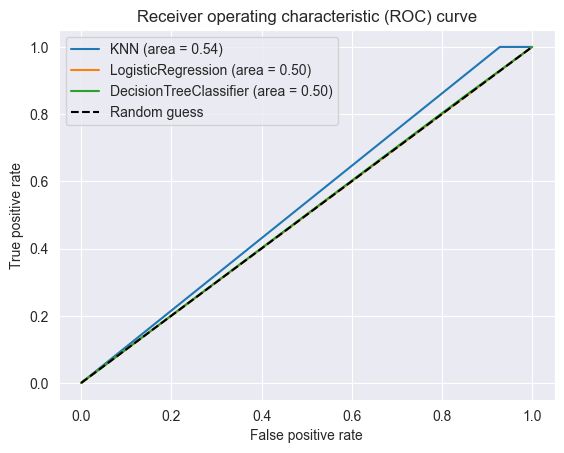

In [30]:
from sklearn.metrics import roc_curve, roc_auc_score
# Compute the false positive rate and true positive rate for different threshold values
fpr, tpr, thresholds = roc_curve(y_test1, y_pred)
fpr1, tpr1, thresholds1 = roc_curve(y_test1, predictions)
fpr2, tpr2, thresholds2 = roc_curve(y_test1, y_predTree)
# Compute the area under the ROC curve
auc = roc_auc_score(y_test1, y_pred)
auc1 = roc_auc_score(y_test1, predictions)
auc2 = roc_auc_score(y_test1, y_predTree)
# Plot the ROC curve
plt.plot(fpr, tpr, label='KNN (area = {:.2f})'.format(auc))
plt.plot(fpr1, tpr1, label='LogisticRegression (area = {:.2f})'.format(auc1))
plt.plot(fpr2, tpr2, label='DecisionTreeClassifier (area = {:.2f})'.format(auc2))

plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend()
plt.show()

## Dit is HEEL slecht.
Deze grafiek laat zien dat het model eigenlijk aan het gokken is. Omdat de dataset ongebalanceerd is, is de score wel hoog. Het model gokt dat patient_status 0 is.
(ongeveer 80% van de test set bij patient_status is 0 daarom is de accuracy ook hoog).

Het kan aan meerdere dingen liggen. Bv: Data of over/under fitting. Maar ik denk dat het de ongebalanceerde data is. Want hierboven heb we gekeken naar de learning curve en deze laat zien dat er geen spraken is van grote under/over fitting.

# Ik ga iets anders proberen te classificeren bij deze dataset

   Histology_Infiltrating Ductal Carcinoma  \
0                                       93   
1                                      224   

   Histology_Infiltrating Lobular Carcinoma  Histology_Mucinous Carcinoma  
0                                       236                           305  
1                                        81                            12  


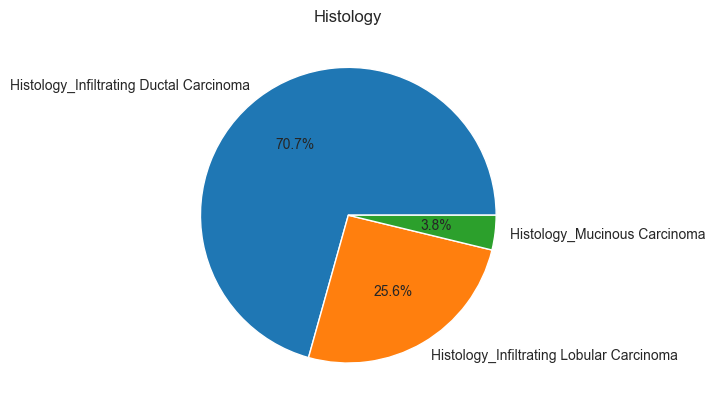

In [31]:
# Get the columns that are one-hot encoded
onehot_cols = [col for col in df.columns if col.startswith('Histology_')]

# Calculate the number of occurrences of each value in each one-hot encoded column
value_counts = pd.DataFrame({col: df[col].value_counts() for col in onehot_cols})

# Print the value counts for each column
print(value_counts)

# Three values for the pie chart
values = [224, 81, 12]
labels = ['Histology_Infiltrating Ductal Carcinoma', 'Histology_Infiltrating Lobular Carcinoma', 'Histology_Mucinous Carcinoma']

# Plot the pie chart
plt.pie(values, labels=labels, autopct='%1.1f%%')

# Add a title to the pie chart
plt.title('Histology')

# Show the pie chart
plt.show()

Slecht verdeeld, ik iets anders proberen te classificeren.

/var/folders/2p/m8pz9vjx3zn73ndc2lz_zb0w0000gn/T/ipykernel_74213/810506368.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Tumour_Stage'].replace({'I': 1, 'II': 2, 'III': 3},inplace = True)


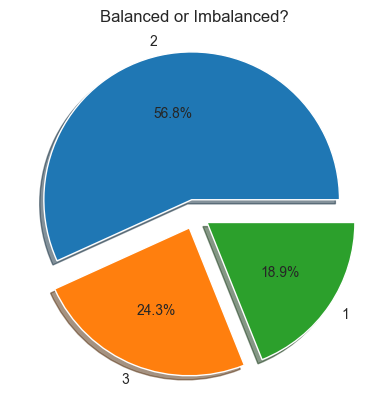

In [32]:
# Count the number of occurrences of each value in the 'Patient_Status' column
data['Tumour_Stage'].replace({'I': 1, 'II': 2, 'III': 3},inplace = True)

value_counts = data['Tumour_Stage'].value_counts()
# Define the label strings using f-strings
label = [f'{"2" if i==0 else "3" if i==1 else "1"}' for i in range(len(value_counts))]
# Create a pie chart with percentage values formatted with a % sign and explode the slices
fig, ax = plt.subplots()
ax.pie(value_counts.values, autopct='%0.1f%%', explode=[0.1, 0.1, 0.1], shadow=True, labels=label)

# Set the title of the pie chart
ax.set_title('Balanced or Imbalanced?')

# Show the pie chart
plt.show()

Tumor stage is wel beter verdeeld maar tumor stage 2 heeft ook een grote meerderheid. Dus het is niet ideaal verdeeld maar wel mee te werken.

   Surgery_type_Lumpectomy  Surgery_type_Modified Radical Mastectomy  \
0                      251                                       228   
1                       66                                        89   

   Surgery_type_Other  Surgery_type_Simple Mastectomy  
0                 220                             252  
1                  97                              65  


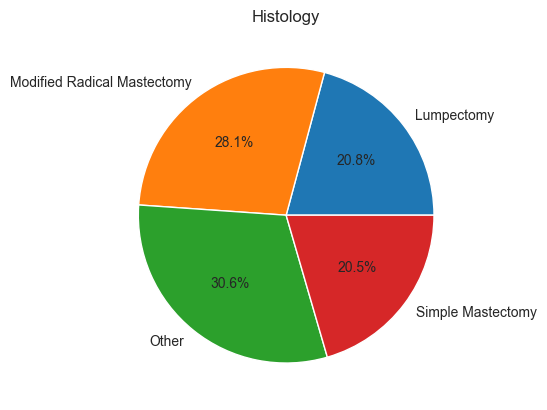

In [33]:
# Get the columns that are one-hot encoded
onehot_cols = [col for col in df.columns if col.startswith('Surgery')]

# Calculate the number of occurrences of each value in each one-hot encoded column
value_counts = pd.DataFrame({col: df[col].value_counts() for col in onehot_cols})

# Print the value counts for each column
print(value_counts)

# Three values for the pie chart
values = [66, 89, 97, 65]
labels = ['Lumpectomy', 'Modified Radical Mastectomy', 'Other', 'Simple Mastectomy']

# Plot the pie chart
plt.pie(values, labels=labels, autopct='%1.1f%%')

# Add a title to the pie chart
plt.title('Histology')

# Show the pie chart
plt.show()

YES eindelijk iets wat beter is verdeeld!



In [34]:
y = df[['Surgery_type_Lumpectomy','Surgery_type_Modified Radical Mastectomy','Surgery_type_Other','Surgery_type_Simple Mastectomy']].values
X = df.drop(['Surgery_type_Lumpectomy','Surgery_type_Modified Radical Mastectomy','Surgery_type_Other','Surgery_type_Simple Mastectomy'], axis=1).values
print(X.shape, y.shape)

(317, 14) (317, 4)


In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2, random_state=1)
# Check the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (253, 14)
y_train shape: (253, 4)
X_test shape: (64, 14)
y_test shape: (64, 4)


In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
# Define the logistic regression model
clf = LogisticRegression(max_iter=1000)

# Define the multioutput classifier
multi_clf = MultiOutputClassifier(clf)

# Train the multioutput classifier
multi_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred1 = multi_clf.predict(X_test)

# Evaluate the model performance
accuracy = multi_clf.score(X_test, y_test)
print("Accuracy: {:.2f}".format(accuracy))

Accuracy: 0.09


0.06 is echt heel slecht. Ik denk dat dit komt omdat de andere tabellen te weinig te maken hebben met deze vier collumns. Dus het voorspellen zal dan hetzelfde zijn als gokken.

Wat ik nu ga doen is 1 Surgery collumn uit de y halen om mee te kunnen trainen. Omdat deze collumn een hoge correlatie heeft met de andere Surgery Collumns. Hierdoor hoop ik de accuracy te verhogen.

In [37]:
y = df[['Surgery_type_Lumpectomy','Surgery_type_Other','Surgery_type_Simple Mastectomy']].values
X = df.drop(['Surgery_type_Lumpectomy','Surgery_type_Other','Surgery_type_Simple Mastectomy'], axis=1).values
print(X.shape, y.shape)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y , test_size=0.2, random_state=1)
# Define the logistic regression model
clf = LogisticRegression(max_iter=1000)

# Define the multioutput classifier
multi_clf = MultiOutputClassifier(clf)

# Train the multioutput classifier
multi_clf.fit(X_train2, y_train2)

# Make predictions on the test set
y_pred2 = multi_clf.predict(X_test2)

# Evaluate the model performance
accuracy = multi_clf.score(X_test2, y_test2)
print("Accuracy: {:.2f}".format(accuracy))

(317, 15) (317, 3)
Accuracy: 0.42


0.42 dat is al wat beter maar zeker nog niet goed.

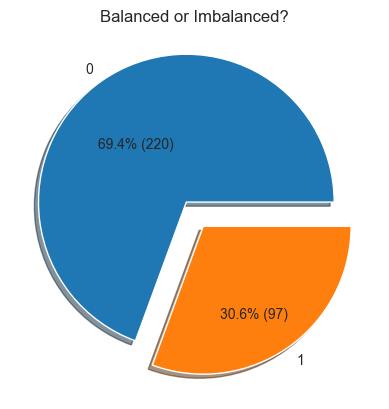

In [38]:
# Count the number of occurrences of each value in the 'Surgery_type_Other' column
df['Surgery_type_Other'].replace({'0': 0, '1': 1},inplace = True)

value_counts = df['Surgery_type_Other'].value_counts()
# Define the label strings using f-strings
label = [f'{"0" if i==0 else "1"}' for i in range(len(value_counts))]
# Create a pie chart with percentage values formatted with a % sign and explode the slices
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(value_counts.values, autopct='%0.1f%%', explode=[0.1, 0.1], shadow=True, labels=label)

# Add count under percentage
for i, autotext in enumerate(autotexts):
    count = value_counts[i]
    autotext.set_text(f'{autotext.get_text()} ({count})')
    autotext.set_y(autotext.get_position()[1]-0.1)

# Set the title of the pie chart
ax.set_title('Balanced or Imbalanced?')

# Show the pie chart
plt.show()

(317, 16) (317, 1)


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


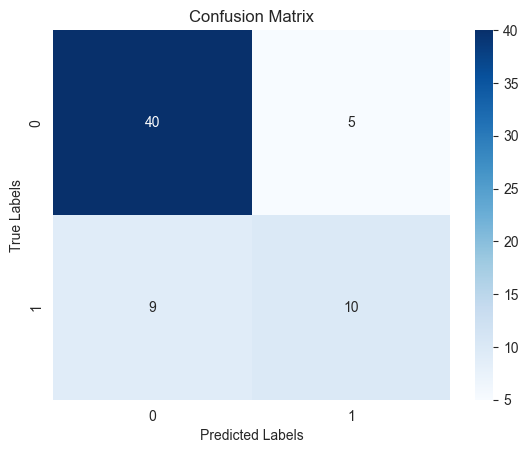

In [39]:
from sklearn.linear_model import LogisticRegression

y = df[['Surgery_type_Other']].values
X = df.drop(['Surgery_type_Simple Mastectomy','Surgery_type_Other'], axis=1).values
print(X.shape, y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2, random_state=1)

model = LogisticRegression(max_iter=1000)

# Fit the logistic regression model to the training data
model.fit(X_train, y_train)

predictions = model.predict(X_test)

from sklearn.metrics import confusion_matrix

# Create the confusion matrix
cm = confusion_matrix(y_test, predictions)
# Create the heatmap using seaborn
sns.heatmap(cm, annot=True, cmap="Blues")
# Set the axis labels and title
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
# Show the plot
plt.show()



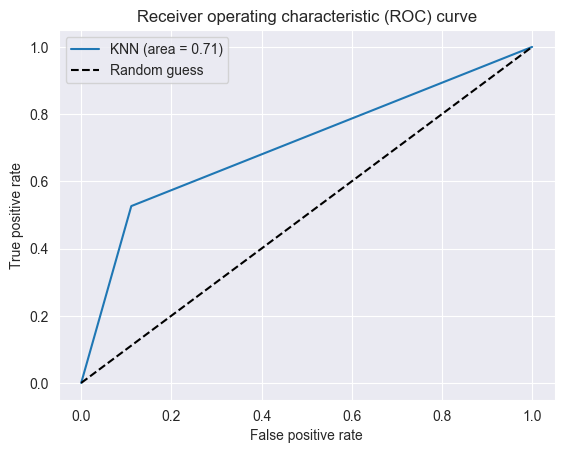

In [40]:
from sklearn.metrics import roc_curve, roc_auc_score
# Compute the false positive rate and true positive rate for different threshold values
fpr, tpr, thresholds = roc_curve(y_test, predictions)

# Compute the area under the ROC curve
auc = roc_auc_score(y_test, predictions)

# Plot the ROC curve
plt.plot(fpr, tpr, label='KNN (area = {:.2f})'.format(auc))


plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend()
plt.show()